In [1]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import os
from PIL import Image

## Images

In [2]:
folder_path = 'data2/micrographs/'

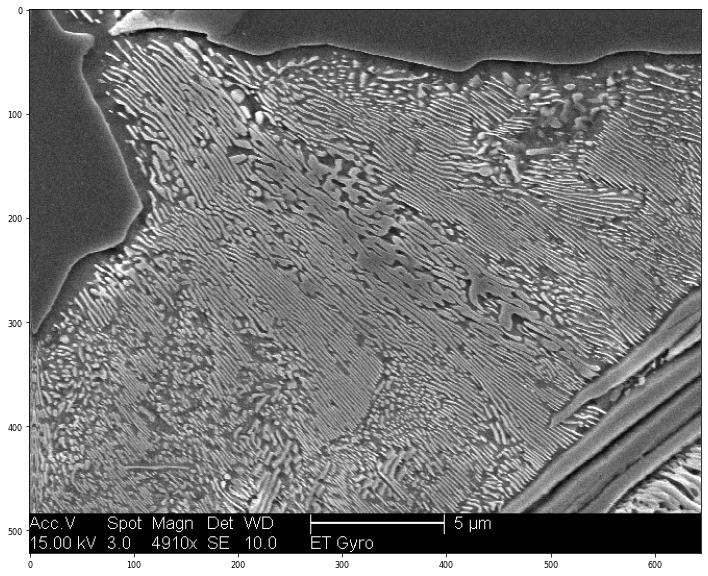

In [15]:
fig = plt.figure(figsize=(20, 10))
plt.imshow(tiff.imread('data2/micrographs/micrograph1.tif'), cmap='gray')

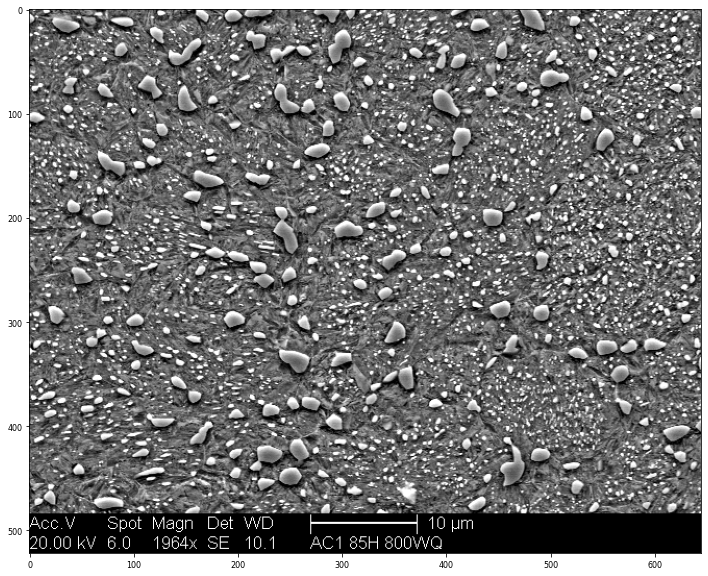

In [16]:
fig = plt.figure(figsize=(20, 10))
plt.imshow(tiff.imread('data2/micrographs/micrograph2.tif'), cmap='gray')

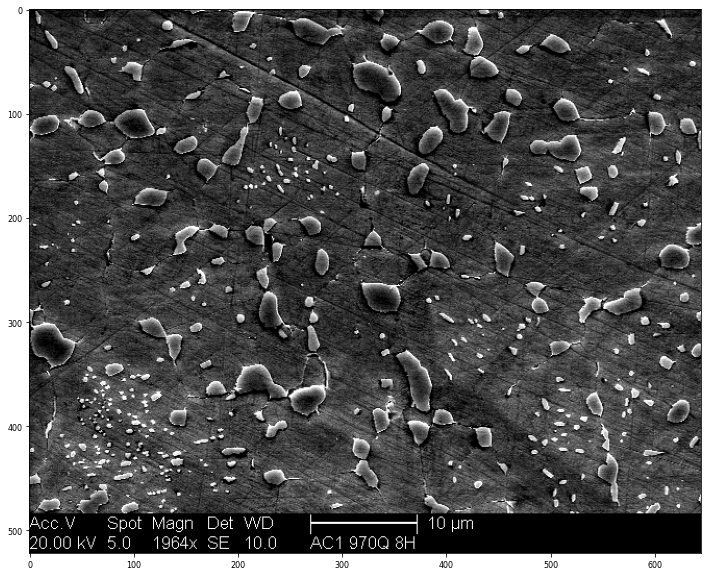

In [46]:
plt.figure(figsize=(20, 10))
plt.imshow(plt.imread('data2/micrographs/micrograph10.png')) ## png

In [125]:
img = plt.imread('data2/micrographs/micrograph10.png')
img.shape ## 4 channels

(522, 645, 4)

In [63]:
np.allclose(img[:, :, 0], img[:, :, 1])

True

In [64]:
np.allclose(img[:, :, 1], img[:, :, 2])

True

In [65]:
np.allclose(img[:, :, 2], img[:, :, 3])

False

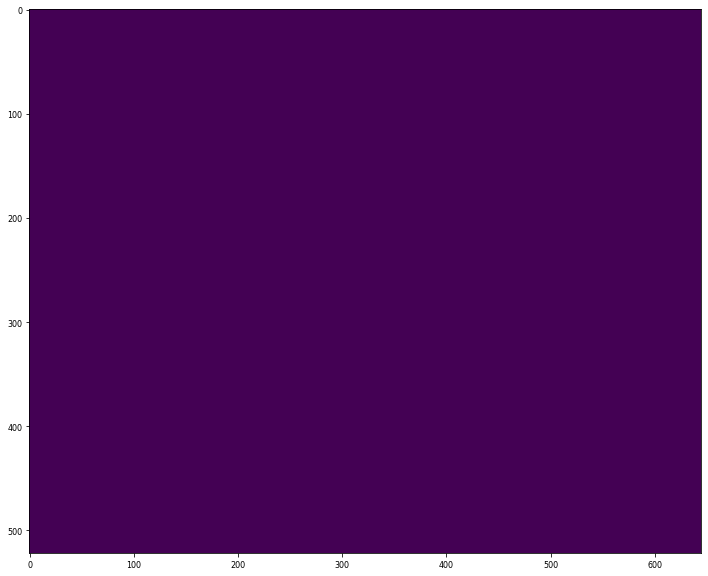

In [67]:
plt.figure(figsize=(20, 10))
plt.imshow(img[:, :, 3])

In [126]:
np.array(Image.open('data2/micrographs/micrograph10.png')).shape ## 1 channel for same image

(522, 645)

In [81]:
from collections import Counter

shapes = []
counter = Counter()
for image_path in os.listdir(folder_path):
    name, extention = image_path.split('.')
    counter[extention] += 1
    if extention == 'tif':
        image = tiff.imread(os.path.join(folder_path, image_path))
    else:
        image = plt.imread(os.path.join(folder_path, image_path))
        
    shapes.append(image.shape)
print('Unique shapes:', set(shapes))
print(counter)

Unique shapes: {(522, 645, 4), (522, 645)}
Counter({'tif': 915, 'png': 46})


## Metadata

In [87]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('data2/microstructures.sqlite')

df = pd.read_sql_query("SELECT * FROM Micrograph", conn)

In [90]:
df

,micrograph_id,path,micron_bar,micron_bar_units,micron_bar_px,magnification,detector,sample_key,contributor_key,primary_microconstituent
0,1,micrograph1.tif,5.0,um,129,4910x,SE,42.0,2,pearlite
1,2,micrograph2.tif,10.0,um,103,1964X,SE,18.0,2,spheroidite
2,4,micrograph4.tif,10.0,um,129,None,SE,35.0,2,pearlite+spheroidite
3,5,micrograph5.tif,5.0,um,129,4910X,SE,10.0,2,pearlite
4,6,micrograph6.tif,20.0,um,124,1178X,SE,29.0,2,spheroidite
...,...,...,...,...,...,...,...,...,...,...
956,1723,micrograph1723.tif,10.0,um,103,1964X,BSE,41.0,2,martensite
957,1726,micrograph1726.tif,5.0,um,90,3437X,SE,34.0,2,spheroidite+widmanstatten
958,1730,micrograph1730.png,10.0,um,103,1964X,SE,40.0,2,spheroidite
959,1731,micrograph1731.tif,1.0,um,129,24551X,SE,47.0,2,pearlite


In [103]:
means = []
for image_path in os.listdir(folder_path):
    name, extention = image_path.split('.')
    counter[extention] += 1
    if extention == 'tif':
        image = tiff.imread(os.path.join(folder_path, image_path))
        means.append(image.mean(axis=1))
    else:
        image = plt.imread(os.path.join(folder_path, image_path))
        means.append(image[:, :, 0].mean(axis=1))

In [106]:
means = np.array(means)

In [109]:
means.mean(axis=0)

array([1.20445350e+02, 1.20336905e+02, 1.20342172e+02, 1.20499607e+02,
       1.20565180e+02, 1.20506894e+02, 1.20693595e+02, 1.20648384e+02,
       1.20581382e+02, 1.20573893e+02, 1.20867358e+02, 1.20880542e+02,
       1.20691590e+02, 1.20850227e+02, 1.21101740e+02, 1.21036931e+02,
       1.21063756e+02, 1.20934252e+02, 1.20916046e+02, 1.20937586e+02,
       1.21150190e+02, 1.21177282e+02, 1.21060707e+02, 1.20831005e+02,
       1.20912448e+02, 1.20911337e+02, 1.20974279e+02, 1.20988509e+02,
       1.21146923e+02, 1.21234962e+02, 1.21339474e+02, 1.21407044e+02,
       1.21344368e+02, 1.21264449e+02, 1.21202548e+02, 1.21217248e+02,
       1.21399741e+02, 1.21322798e+02, 1.21368917e+02, 1.21485688e+02,
       1.21405817e+02, 1.21532932e+02, 1.21464893e+02, 1.21390625e+02,
       1.21414390e+02, 1.21168537e+02, 1.20993066e+02, 1.20901541e+02,
       1.20905570e+02, 1.20760063e+02, 1.20862693e+02, 1.21010702e+02,
       1.21023738e+02, 1.21072708e+02, 1.21219496e+02, 1.21218667e+02,
      

In [110]:
means[0]

array([ 80.59844961,  80.68217054,  80.95193798,  82.09147287,
        81.23255814,  80.47596899,  80.83255814,  80.6620155 ,
        80.31317829,  79.85891473,  81.02325581,  80.98914729,
        83.27906977,  82.36744186,  83.78294574,  84.39224806,
        85.69457364,  85.86976744,  81.12403101,  77.31937984,
        74.31007752,  72.75968992,  72.59224806,  74.17364341,
        73.12248062,  71.4372093 ,  72.08992248,  75.13023256,
        76.31937984,  78.06821705,  80.46046512,  81.53953488,
        83.98604651,  86.92248062,  87.54108527,  84.67286822,
        85.39844961,  86.13178295,  87.16124031,  90.14263566,
        89.42790698,  90.9875969 ,  90.55193798,  85.26356589,
        85.48217054,  87.22015504,  91.95658915,  95.17054264,
        97.17829457,  97.60620155,  96.90542636,  97.27286822,
        95.7379845 ,  92.10232558,  97.18294574, 105.08527132,
       104.61550388, 102.88062016, 101.40155039, 104.20465116,
       103.34108527, 108.59534884, 111.10697674, 114.44

In [119]:
means[0][-38]

0.0

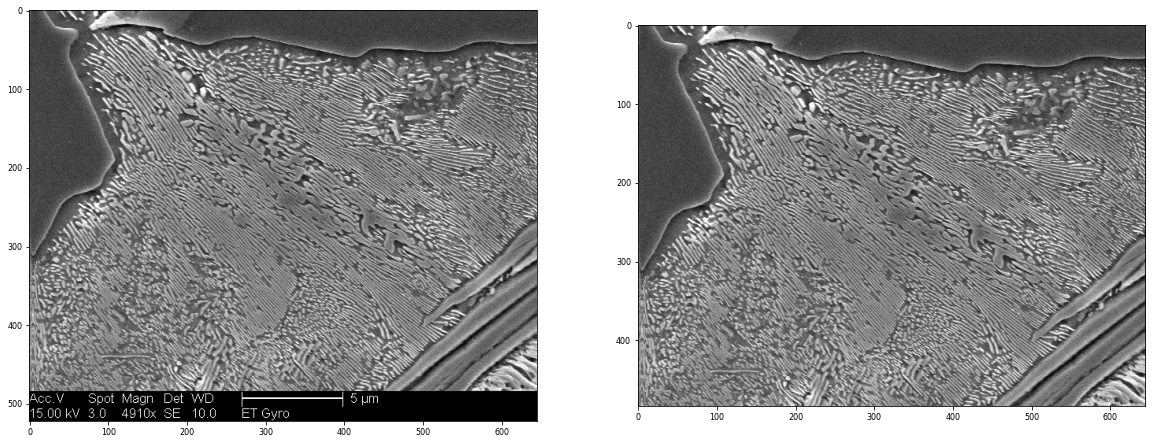

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(tiff.imread('data2/micrographs/micrograph1.tif'), cmap='gray')
ax[1].imshow(tiff.imread('data2/micrographs/micrograph1.tif')[:-38], cmap='gray')